# LAB:   Desafío 1.

## Objetivos

* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

El dataset contiene información referida al primer semestre de 2017 de las propiedades comercializables por la empresa:

* Fecha de creación
* Tipo de la propiedad (house, apartment, ph )
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m²
* Superficie cubierta en m²
* Precio en USD/m²
* Precio por m²
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto

## ¿Cómo empezar? Sugerencias
Agreguen toda otra información construida a partir de los datos originales (o incluso
información externa) que consideren relevante y útil para resolver los objetivos planteados.
Aprovechen las herramientas de pandas: gropuby , summation, pivot_tables y otras
aplicaciones y métodos de los DataFrames hacen mucho más simples los cálculos y otras
agregaciones de los datos.
En la presentación de los resultados tengan en cuenta que es altamente probable que la
audiencia no tenga un nivel técnico así que mantengan el lenguaje en un nivel accesible.
En términos generales, recuerden las siguientes sugerencias:
* escribir un pseudocódigo antes de empezar a codear. Suele ser muy útil para darle un esquema y una lógica generales al análisis
* leer la documentación de cualquier tecnología o herramienta de análisis que uses. A veces no hay tutoriales para todo y los documentos y las ayudas son fundamentales para entender el funcionamiento de las herramientas utilizadas
* documentar todos los pasos, transformaciones, comandos y análisis que realices.

## Recursos útiles
* Documentación de la librería GeoPandas
* Github

##Tareas

##1 - ver calidad
* NaN
* vacios
* inconsistencias entre keywords columnas vs keywords url
* monedad $/u$s
* EDA / Media central y outliers
* correlacion
* MNAR/MNCAR etc
* mejor opcion de fill

In [182]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#from unidecode import unidecode #QUITO TILDES


## funcion auxiliar de cotizacion/conversion $ a u$s (nota:sin fechas...dificil)

In [183]:
def getCotizacionUSD(fecha):
    #carga cotizacion dolar
    dfUSD = pd.read_csv('cotizacion_diaria_dolar.csv')  # Fuente : BCRA
    # Convierto la columna de fecha en un datetime.
    dfUSD.Fecha = pd.to_datetime(dfUSD.Fecha)
    dfUSD['Cotizacion'] = dfUSD['Cotizacion'].str.replace(',', '.')
    dfUSD['Cotizacion'] = dfUSD['Cotizacion'].astype('float64') 
    dfUSD.set_index('Fecha',inplace=True)
    #dfUSD.loc['2002-04-03 00:00:00']
    return dfUSD.loc[pd.to_datetime(fecha)][0]

#cotizacion = getCotizacionUSD('2002-04-03 00:00:00')


In [184]:
#print (cotizacion)

In [185]:
#cotizacion.dtype

In [186]:
# Cargar la data
df = pd.read_csv('properatti.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI
print(df.columns)
df.info()


Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null fl

In [187]:
df.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [188]:
###CANT OPERACIONES
cantOperaciones = df.operation.count()

In [189]:
df.dtypes
#df['currency'].head()

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [190]:
#Cuento los null



In [191]:
dfInconsistentes = (df.isnull().sum())


In [301]:
#####ARMO UN DF para medir la calidad de los datos
###Controlo la cantidad de elementos distintos
###COntrolo la prob de error que es NAN/Total
###Me quedo con los que no tienen error son pocos . 
pd.Series( (dfInconsistentes.values/cantOperaciones))
df_ = pd.DataFrame(data=None,index=None)
dfCalidad = df_.fillna(0)
dfCalidad['Prob_Error'] =dfInconsistentes/ cantOperaciones
dfCalidad['Cant']=(df.isnull().sum())
dfCalidad['CantOper']=(cantOperaciones)
dfCalidad['CantDistinct']=pd.Series(data=None,index=None)


for i in dfCalidad[dfCalidad.Prob_Error==0].index:
    dfCalidad.CantDistinct[i]=df[i].unique().size

dfHQuality= dfCalidad[dfCalidad.Prob_Error==0]
    
dfHQuality.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Prob_Error,Cant,CantOper,CantDistinct
count,8.0,8.0,8.0,8.000000
mean,0.0,0.0,121220.0,39542.875000
std,0.0,0.0,0.0,56273.360631
min,0.0,0.0,121220.0,1.000000
25%,0.0,0.0,121220.0,3.250000
50%,0.0,0.0,121220.0,596.000000
75%,0.0,0.0,121220.0,84833.750000
max,0.0,0.0,121220.0,121220.000000


In [302]:
#######Estos son los claves
dfHQuality[dfHQuality.CantDistinct < dfHQuality.CantDistinct.quantile(0.5)]

,Prob_Error,Cant,CantOper,CantDistinct
operation,0.0,0,121220,1.0
property_type,0.0,0,121220,4.0
country_name,0.0,0,121220,1.0
state_name,0.0,0,121220,28.0


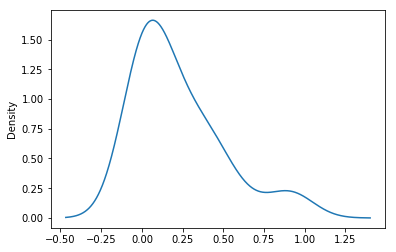

In [306]:
#####Densidad
plt.figure
dfCalidad.Prob_Error.plot.kde()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee363db70>,
      dtype=object)

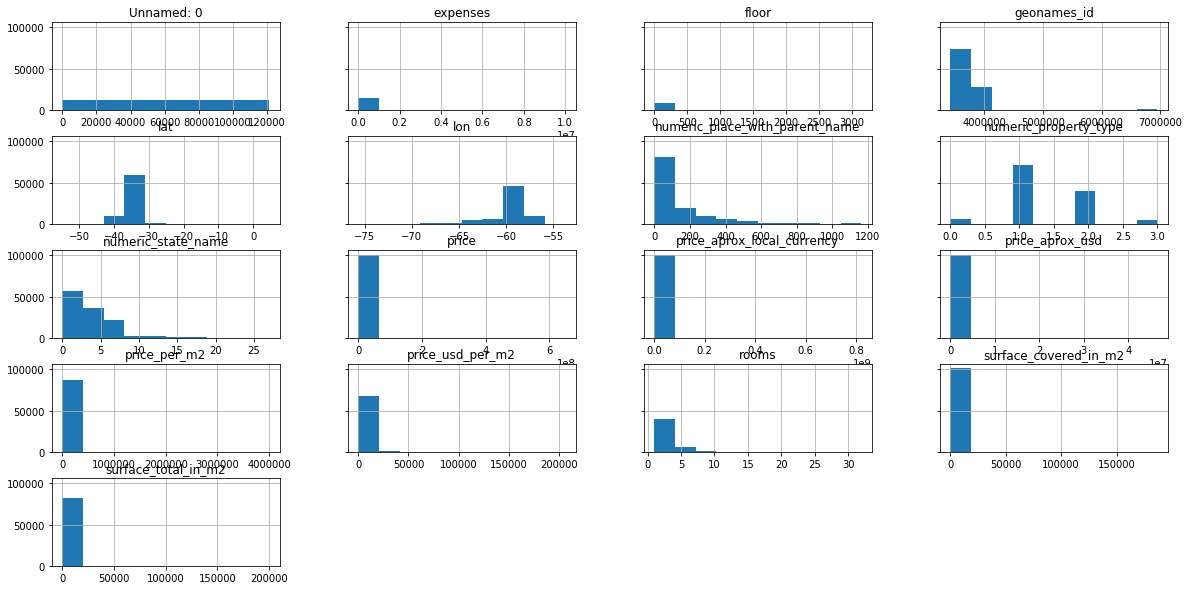

In [310]:
df.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee6359358>,
      dtype=object)

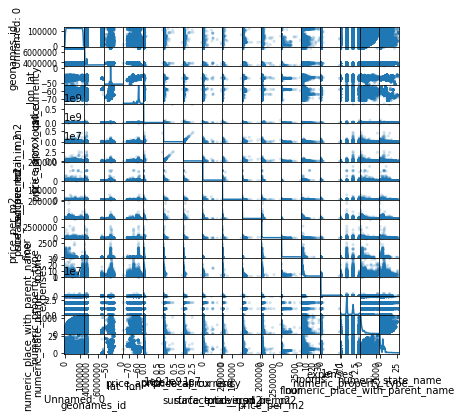

In [312]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

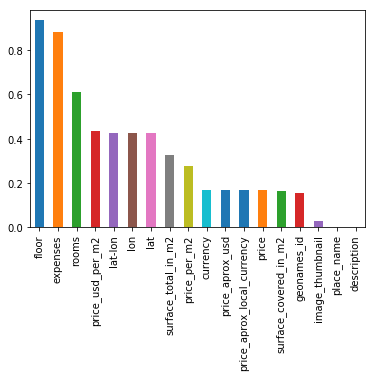

In [311]:
plt.figure
dfCalidad.loc[dfCalidad.Prob_Error!=0].Prob_Error.sort_values(ascending=False).plot(kind='bar');




In [194]:
#dfCalidad.Prob_Error.plot(kind='density')


In [195]:
#dfCalidad['Prob_Error'].plot(kind='hist', alpha=0.1)

In [196]:
#plt.figure(figsize=(800,800));

#bp = dfCalidad.boxplot(column=['Prob_Error'],return_type='axes',by=dfCalidad.index)


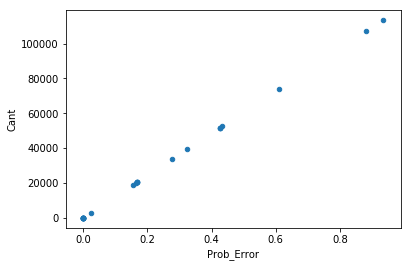

In [197]:
dfCalidad.plot(kind='scatter', x=0, y=1)

In [198]:
clavesProbablesProperati=dfCalidad.loc[dfCalidad.Prob_Error==1].index

In [199]:
clavesProbablesProperati[1:8]

Index([], dtype='object')

####DONDE ESTA FECHA?????
df[clavesProbablesProperati[0:1][0]].unique()

In [200]:
#pd.to_datetime(df[clavesProbablesProperati[1:8]], unit='ms')

In [201]:
for x in clavesProbablesProperati[1:6]:
    size=df[x].unique().size
    print (x,size)

In [202]:
###operaciones y pais son 1 - no hay necesidad de ver correlacion.


In [203]:
##clasificadores
dfPropertyType=pd.DataFrame(data=df.property_type.unique())
dfPlaceParentName = pd.DataFrame(data=df.place_with_parent_names.unique())
#dfPlaceName=pd.DataFrame(data=df.place_name.unique())
dfStateName=pd.DataFrame(data=df.state_name.unique())



In [204]:
def getIdByDiccionario(diccionario,valor):
    return diccionario[diccionario.values==valor].index[0]

#getIdByDiccionario(dfPlaceName,'Malabrigo')
#dictProperaty[dictProperaty.values=='PH'].index[0]

In [217]:
def agregaColumnaAProperatiDF(dfaux,dfdicc,nombre_col):
    npArr = np.zeros( dfaux.size,dtype='int')
    idx=0
    for x in dfaux:
        idxPT=(getIdByDiccionario(dfdicc,x))
        npArr[idx]=idxPT
        idx=idx+1
    df[nombre_col]=pd.DataFrame(npArr, dtype='int')

#agregaColumnaAProperatiDF(df.place_name, dfPlaceName, 'id_place_name')

In [213]:
####Agrego COLUMNA - State Name
npArr = np.zeros( df.state_name.size,dtype='int')
idx=0
for x in df.state_name:
    idxPT=(getIdByDiccionario(dfStateName,x))
    npArr[idx]=idxPT
    idx=idx+1

df['numeric_state_name']=pd.DataFrame(npArr, dtype='int')

In [218]:
####Agrego COLUMNA - Property Type
npArrPropertyTypeIdx = np.zeros( df.property_type.size,dtype='int')
idx=0
for x in df.property_type:
    idxPT=(getIdByDiccionario(dfPropertyType,x))
    npArrPropertyTypeIdx[idx]=idxPT
    idx=idx+1
#npArrPropertyTypeIdx
#for x in df.property_type:
#    print (getIdByDiccionario(dfPropertyType,x))

dfPTI = pd.DataFrame(npArrPropertyTypeIdx, dtype='int')

df['numeric_property_type']=dfPTI




In [219]:
npArr = np.zeros( df.place_name.size,dtype='int')
idx=0
for x in df.property_type:
    idxPT=(getIdByDiccionario(dfPlaceName,x))
    npArr[idx]=idxPT
    idx=idx+1
#npArrPropertyTypeIdx
#for x in df.property_type:
#    print (getIdByDiccionario(dfPropertyType,x))

dfPTI = pd.DataFrame(npArr, dtype='int')

df['numeric_place_name']=dfPTI



IndexError: index 0 is out of bounds for axis 0 with size 0

In [210]:
####Agrego COLUMNA - Place Parent Name
npArrPPNIdx = np.zeros( df.place_with_parent_names.size,dtype='int')
idx=0
for x in df.place_with_parent_names:
    idxPT=(getIdByDiccionario(dfPlaceParentName,x))
    npArrPPNIdx[idx]=idxPT
    idx=idx+1

#for x in df.property_type:
#    print (getIdByDiccionario(dfPropertyType,x))
df['numeric_place_with_parent_name']=pd.DataFrame(npArrPPNIdx, dtype='int')

In [212]:
df.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,numeric_property_type,numeric_place_with_parent_name
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,0,0
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,1,1
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,0
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0,2
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,1,3


In [46]:
df1_ = pd.DataFrame(data=None,index=None)
dfDescs = df1_.fillna(0)
dfDescs['titulos'] =df[clavesProbablesProperati[7:8][0]].unique()
dfDescs
dfDescs= dfDescs.titulos.str.split(expand=True).stack().value_counts()
dfDescs.value_counts 

<bound method IndexOpsMixin.value_counts of en                   25401
-                    21604
Casa                 12193
2                    10776
de                   10671
con                  10378
Departamento          9809
EN                    9068
3                     9004
Venta                 8980
VENTA                 6039
y                     5195
ambientes             5143
CASA                  5100
a                     5099
DE                    5075
4                     4273
A                     4181
por                   4153
U$S                   3979
San                   3850
1                     3794
AMBIENTES             3633
CON                   3587
DEPARTAMENTO          3441
al                    3367
venta                 3317
PH                    2895
Excelente             2703
Y                     2447
                     ...  
blóck                    1
Pcias                    1
septimo                  1
cuádruple                1
categoria.3

In [84]:
dfDescs.value_counts(normalize=True)




1        0.603989
2        0.125432
3        0.058458
4        0.035290
5        0.024063
6        0.016545
7        0.011891
8        0.009538
9        0.008413
10       0.007365
11       0.006572
13       0.005012
12       0.004731
14       0.003734
15       0.003682
16       0.003657
20       0.003069
17       0.003043
19       0.002915
18       0.002890
21       0.001892
22       0.001816
23       0.001637
25       0.001458
24       0.001432
26       0.001432
28       0.001432
27       0.001381
29       0.001227
35       0.001202
           ...   
5075     0.000026
8980     0.000026
2227     0.000026
210      0.000026
370      0.000026
402      0.000026
434      0.000026
466      0.000026
562      0.000026
848      0.000026
592      0.000026
2895     0.000026
399      0.000026
5100     0.000026
21604    0.000026
351      0.000026
10378    0.000026
239      0.000026
303      0.000026
367      0.000026
655      0.000026
528      0.000026
1071     0.000026
1519     0.000026
240      0

In [ ]:
##Exploramos que operaciones tenemosc
clavesProbablesProperati

#df['operation'].unique()

In [ ]:
dfCalidad.Prob_Error.describe()

#dfCalidad.loc[dfCalidad.Prob_Error==0.95].index

#dfInconsistentes['Porc'] = dfInconsistentes.apply(lambda x: x/cantOperaciones for x in df.isnull().sum())
#dfInconsistentes
#dfInconsistentes


In [ ]:
pdSummarize

In [ ]:
pdSummarize=pdSummarize.T.rename(index=str, columns={0:'Tipo',1:'NaN'})
pdSummarize

In [ ]:
pdSummarize.NaN = pdSummarize.NaN/cantOperaciones
####  CALIDAD DE LOS DATOS 
pdSummarize[['NaN' > 0.6])

In [ ]:
pdSummarize.loc(1)

In [ ]:
df.price_per_m2.isna().count()

In [ ]:
df=df.rename(index=str, columns={
"Unnamed: 0": "IDENTITY",
"operation": "OPERACION",
"property_type": "PROP_TIPO",
"place_name": "BARRIO",
"place_with_parent_names": "BARRIO_COMPLETO",
"country_name": "PAIS",
"state_name": "PROVINCIA",
"geonames_id": "GEONAME_ID",
"lat-lon": "LAT-LON",
"lat": "LAT",
"lon": "LON",
"price": "PRC",
"currency": "MONEDA",
"price_aprox_local_currency": "PRC_APROX_LC",
"price_aprox_usd": "PRC_APROX_USD",
"surface_total_in_m2": "M2_TOTAL",
"surface_covered_in_m2": "M2_CUBIERTOS",
"price_usd_per_m2": "PRC_M2_USD",
"price_per_m2": "PRC_M2_LC",
"floor": "QTY_PLANTA",
"rooms": "QTY_AMBIENTES",
"expenses": "PRC_EXPENSAS",
"properati_url": "URL_PROPERATI",
"description": "DESCRIPCION",
"title": "TITULO",
"image_thumbnail": "IMAGEN"})

In [ ]:
df.describe()

# Nueva sección

In [ ]:
#df[('MONEDA')]!='USD'

In [ ]:
dfp = df
dfp

In [ ]:
# Filtro los de CABA, PRECIO Y M2
df = df[(df['PROVINCIA'] == 'Capital Federal') & (df['PRC'] > 0) & (df['M2_TOTAL'] > 0)].drop(columns=['BARRIO_COMPLETO', 'PAIS', 'MONEDA', 'PRC_APROX_LC',
       'PRC_APROX_USD', 'PRC_M2_USD', 'PRC_M2_LC', 'M2_CUBIERTOS'])
df.head()

In [ ]:
df6 = df[[ 'BARRIO', 'PRC', 'M2_TOTAL', 'QTY_PLANTA',
       'QTY_AMBIENTES', 'PRC_EXPENSAS']]
df7 = df[[ 'PRC', 'M2_TOTAL', 'QTY_PLANTA',
       'QTY_AMBIENTES', 'PRC_EXPENSAS']]
df6.describe()

In [ ]:
# Precio vs M2
sns.jointplot(dfp['PRC'],dfp['M2_TOTAL'])
plt.show()

In [ ]:
#df=df.join(pd.get_dummies(df['OPERACION'],prefix='OPERACION'))
# df.head()

DF_TEXT=df[['IDENTITY','QTY_PLANTA','QTY_AMBIENTES','DESCRIPCION','TITULO']]

DF_TEXT.loc[:,"DESCRIPCION"]=DF_TEXT.loc[:,"DESCRIPCION"].str.upper()

DF_TEXT.loc[:,"TITULO"]=DF_TEXT.loc[:,"TITULO"].str.upper()





In [ ]:
# reemplazo caracteres especiales
cols = DF_TEXT.select_dtypes(include=[np.object]).columns
DF_TEXT[cols]=DF_TEXT[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))



In [ ]:
#Traigo todos los datos que contengan la palabra AMB o AMBIENTE y excluyo los que ya tienen la cantidad de ambientes

DF_TEXT2=DF_TEXT[((DF_TEXT["DESCRIPCION"].str.find("AMBIENTES")>0)|(DF_TEXT["DESCRIPCION"].str.find("AMB")>0)) & (DF_TEXT["QTY_AMBIENTES"].isnull()==1)]

DF_TEXT2["DESCRIPCION_AMB"]=DF_TEXT2["DESCRIPCION"].str.find("AMB")
DF_TEXT2["TITULO_AMB"]=DF_TEXT2["TITULO"].str.find("AMB")



In [ ]:
DF_TEXT2['QTY_AMB_DESC'] = DF_TEXT2.apply(lambda x: x['DESCRIPCION'][x['DESCRIPCION_AMB']-2:x['DESCRIPCION_AMB']-1], 1)
DF_TEXT2['QTY_AMB_TITLE'] = DF_TEXT2.apply(lambda x: x['DESCRIPCION'][x['TITULO_AMB']-2:x['TITULO_AMB']-1], 1)

DF_TEXT2.drop(columns=['DESCRIPCION_AMB', 'TITULO_AMB'],inplace=True)



In [ ]:
DF_TEXT2.head()

In [ ]:
DF_TEXT2['DESC_TYPE']=DF_TEXT2['QTY_AMB_DESC'].str.isnumeric()
DF_TEXT2['TITLE_TYPE']=DF_TEXT2['QTY_AMB_TITLE'].str.isnumeric()

DF_TEXT2=DF_TEXT2[(DF_TEXT2['DESC_TYPE']==True)|(DF_TEXT2['TITLE_TYPE']==True)]

DF_TEXT2['QTY_AMB_DESC']=np.where(DF_TEXT2['DESC_TYPE']==False, np.nan, DF_TEXT2['QTY_AMB_DESC'])
DF_TEXT2['QTY_AMB_TYPE']=np.where(DF_TEXT2['TITLE_TYPE']==False, np.nan, DF_TEXT2['QTY_AMB_TITLE'])

DF_TEXT2['QTY_AMBIENTES_CALC']= DF_TEXT2[['QTY_AMB_DESC','QTY_AMB_DESC']].max(axis=1)

DF_TEXT2.drop(columns=["QTY_AMB_DESC","QTY_AMB_TITLE","DESC_TYPE","TITLE_TYPE","QTY_AMB_TYPE"],inplace=True)

In [ ]:
# Agrego la columna calculada con la cantidad de ambientes y la seteo en el df original
CALC_AMB = DF_TEXT2[['QTY_AMBIENTES_CALC']]

df=df.join(CALC_AMB,rsuffix='_',how='left')

df['QTY_AMBIENTES']=np.where(df['QTY_AMBIENTES'].isnull() == True, df['QTY_AMBIENTES_CALC'], df['QTY_AMBIENTES'])


In [ ]:
df.describe()


In [ ]:
df.columns

In [ ]:
x1=(DF_TEXT['DESCRIPCION'])
x2=(DF_TEXT['TITULO'])

DF_TEXT3=pd.DataFrame(pd.concat([x1, x2],names='a', axis=0))

DF_TEXT3=DF_TEXT3.dropna()


In [ ]:
stop_words = get_stop_words('spanish')

In [ ]:
# traigo todas las palabras que aparezcan al menos en un 3% de df
count= CountVectorizer(encoding='latin1', ngram_range=[1,3], min_df=0.003,)
count.fit(DF_TEXT3[0])
a=count.fit_transform(DF_TEXT3[0])


In [ ]:
# ARMO DICT y lo convierto en un DF

b=count.vocabulary_
c=pd.DataFrame(list(b.items()), columns=['palabra', 'cant'])
# c.sort_values(by=['cant'],ascending=False, inplace=True)
c['palabra']= c['palabra'].str.upper()



In [ ]:
# exporto para analizar
# c.to_csv('dict2.csv')


In [ ]:

#Traigo nuevamente el csv con las palabras que a mi me interesan
AMENITIES=pd.read_csv('dict2_agrup.csv')
AMENITIES=AMENITIES[AMENITIES['flag']==1]

In [ ]:
DF_PRUEBA=df

In [ ]:
z0=pd.DataFrame(np.zeros((len(DF_PRUEBA),len(AMENITIES))),columns=list(AMENITIES['palabra'].values))
DF_PRUEBA=DF_PRUEBA.join(z0,how='left')


In [ ]:
for i in range(0,len(AMENITIES)):
    NOMBRE_COL=(AMENITIES['palabra'][i:i+1].item())
    q1= DF_PRUEBA['DESCRIPCION'].str.find(NOMBRE_COL)
    q2= DF_PRUEBA['TITULO'].str.find(NOMBRE_COL)
    q3=pd.concat([q1,q2],axis=1)
    q3=q3.max(axis=1)
    DF_PRUEBA[NOMBRE_COL]= q3
    DF_PRUEBA[NOMBRE_COL] = np.where(DF_PRUEBA[NOMBRE_COL] < 0, 0, DF_PRUEBA[NOMBRE_COL])
    DF_PRUEBA[NOMBRE_COL] = np.where(DF_PRUEBA[NOMBRE_COL] > 0, 1, DF_PRUEBA[NOMBRE_COL])




In [ ]:
# reemplazo los amenities por las agrupaciones de amenities

AGRUP=pd.Series(AMENITIES['agrupado'].unique())
for i in range(0,len(pd.Series(AMENITIES['agrupado'].unique()))):
    NOMBRE_AGRUP=AGRUP[i:i+1].item()
    NOMBRE_PALABRA_AGRUP=AMENITIES[AMENITIES['agrupado']==NOMBRE_AGRUP]['palabra'].values
    NUEVA_COL='AGRUP_'+NOMBRE_AGRUP
    DF_PRUEBA[NUEVA_COL]=np.sum(DF_PRUEBA[NOMBRE_PALABRA_AGRUP],axis=1)
    DF_PRUEBA[NUEVA_COL] = np.where(DF_PRUEBA[NUEVA_COL] == 0, 0, DF_PRUEBA[NUEVA_COL])
    DF_PRUEBA[NUEVA_COL] = np.where(DF_PRUEBA[NUEVA_COL] > 0, 1, DF_PRUEBA[NUEVA_COL])

In [ ]:
DF_PRUEBA=DF_PRUEBA.drop(columns=AMENITIES['palabra'].values)

In [ ]:
#Agrego columnas de los amenities al df original

AGRUP_COL=pd.Series('AGRUP_'+AMENITIES['agrupado'].unique()).values

df=df.join(DF_PRUEBA[AGRUP_COL], how='left')

In [ ]:
# Elimino las columnas que no voy a utilizar
df.columns




In [ ]:
df.drop(columns=['IDENTITY','OPERACION','LAT-LON','GEONAME_ID','LAT', 'LON','URL_PROPERATI', 'DESCRIPCION', 'TITULO', 'IMAGEN','QTY_AMBIENTES_CALC'],inplace=True)


In [ ]:
# OBTENGO DUMMIES DE LO QUE ME INTERESA FILTRAR
df['BARRIO_CALC']=df['PROVINCIA']+', '+ df['BARRIO']


PROP_TIPO=pd.get_dummies(df['PROP_TIPO'],prefix='PROP_TIPO')
BARRIO=pd.get_dummies(df['BARRIO_CALC'],prefix='BARRIO')



In [ ]:
# Sumo dummies al dataset

df=df.join(PROP_TIPO)
df=df.join(BARRIO)

df.drop(columns=['PROP_TIPO', 'BARRIO','PROVINCIA','BARRIO_CALC'],inplace=True)

In [ ]:
list(df.columns)

In [ ]:
dfcont = df[['PRC',
 'M2_TOTAL',
 'QTY_PLANTA',
 'QTY_AMBIENTES',
 'PRC_EXPENSAS']]

In [ ]:
dfdummies = df[[ 'AGRUP_LAVADERO',
 'AGRUP_PLANTA BAJA',
 'AGRUP_APTO CREDITO',
 'AGRUP_A ESTRENAR',
 'AGRUP_BALCON',
 'AGRUP_TOILETTE',
 'AGRUP_COCHERA',
 'AGRUP_PISOS DE MADERA',
 'AGRUP_MUEBLES BAJO MESADA',
 'AGRUP_BAJAS EXPENSAS',
 'AGRUP_EXCELENTE UBICACION',
 'AGRUP_PH',
 'AGRUP_RECICLADO',
 'AGRUP_BAULERA',
 'AGRUP_AIRE ACONDICIONADO',
 'AGRUP_ENTRADA INDEPENDIENTE',
 'AGRUP_SIN EXPENSAS',
 'AGRUP_PISOS DE PINOTEA',
 'AGRUP_MONOAMBIENTE',
 'AGRUP_SOLARIUM',
 'AGRUP_LAUNDRY',
 'AGRUP_TERRAZA',
 'AGRUP_PILETA',
 'AGRUP_SAUNA',
 'AGRUP_GIMNASIO',
 'AGRUP_RESIDENCIAL',
 'AGRUP_BARRIO CERRADO',
 'AGRUP_DUPLEX',
 'AGRUP_PISOS DE PARQUET',
 'AGRUP_PARRILLA',
 'AGRUP_VESTIDOR',
 'AGRUP_COMEDOR DIARIO',
 'AGRUP_SOLO EFECTIVO',
 'AGRUP_JACUZZI',
 'AGRUP_PISOS DE PORCELANATTO',
 'AGRUP_ACERO INOXIDABLE',
 'AGRUP_MESADA DE GRANITO',
 'AGRUP_GALERIA CUBIERTA',
 'AGRUP_LOSA RADIANTE',
 'AGRUP_CONTRA FRENTE',
 'AGRUP_BUENA VISTA',
 'AGRUP_HOGAR LENA',
 'AGRUP_FINANCIACION',
 'AGRUP_PALIER',
 'AGRUP_SUM',
 'AGRUP_DOBLE VIDRIO',
 'AGRUP_BALCON FRANCES',
 'AGRUP_PISOS CERAMICOS',
 'AGRUP_ESQUINA',
 'AGRUP_PISO POR ESCALERA',
 'AGRUP_LOFT',
 'AGRUP_APTO PROFESIONAL',
 'AGRUP_PISO DE PARQUET',
 'AGRUP_MESADA DE MARMOL',
 'AGRUP_GRUPO ELECTROGENO',
 'AGRUP_PLAYROOM',
 'AGRUP_HIDROMASAJE',
 'AGRUP_PORTON AUTOMATICO',
 'AGRUP_RIEGO POR ASPERSION',
 'AGRUP_ULTIMO PISO',
 'AGRUP_PILETA CLIMATIZADA',
 'AGRUP_ALTILLO',
 'AGRUP_CALEFACCION',
 'AGRUP_TARQUINI',
 'AGRUP_JARDIN DE INVIERNO',
 'AGRUP_CALDERA',
 'AGRUP_SEGURIDAD 24HS',
 'AGRUP_CANCHA DE FUTBOL',
 'AGRUP_CANCHA DE TENIS',
 'AGRUP_TRIPLEX',
 'PROP_TIPO_PH',
 'PROP_TIPO_apartment',
 'PROP_TIPO_house',
 'PROP_TIPO_store',
 'BARRIO_Capital Federal, Abasto',
 'BARRIO_Capital Federal, Agronomía',
 'BARRIO_Capital Federal, Almagro',
 'BARRIO_Capital Federal, Balvanera',
 'BARRIO_Capital Federal, Barracas',
 'BARRIO_Capital Federal, Barrio Norte',
 'BARRIO_Capital Federal, Belgrano',
 'BARRIO_Capital Federal, Boca',
 'BARRIO_Capital Federal, Boedo',
 'BARRIO_Capital Federal, Caballito',
 'BARRIO_Capital Federal, Capital Federal',
 'BARRIO_Capital Federal, Catalinas',
 'BARRIO_Capital Federal, Centro / Microcentro',
 'BARRIO_Capital Federal, Chacarita',
 'BARRIO_Capital Federal, Coghlan',
 'BARRIO_Capital Federal, Colegiales',
 'BARRIO_Capital Federal, Congreso',
 'BARRIO_Capital Federal, Constitución',
 'BARRIO_Capital Federal, Flores',
 'BARRIO_Capital Federal, Floresta',
 'BARRIO_Capital Federal, Las Cañitas',
 'BARRIO_Capital Federal, Liniers',
 'BARRIO_Capital Federal, Mataderos',
 'BARRIO_Capital Federal, Monserrat',
 'BARRIO_Capital Federal, Monte Castro',
 'BARRIO_Capital Federal, Nuñez',
 'BARRIO_Capital Federal, Once',
 'BARRIO_Capital Federal, Palermo',
 'BARRIO_Capital Federal, Palermo Chico',
 'BARRIO_Capital Federal, Palermo Hollywood',
 'BARRIO_Capital Federal, Palermo Soho',
 'BARRIO_Capital Federal, Palermo Viejo',
 'BARRIO_Capital Federal, Parque Avellaneda',
 'BARRIO_Capital Federal, Parque Centenario',
 'BARRIO_Capital Federal, Parque Chacabuco',
 'BARRIO_Capital Federal, Parque Chas',
 'BARRIO_Capital Federal, Parque Patricios',
 'BARRIO_Capital Federal, Paternal',
 'BARRIO_Capital Federal, Pompeya',
 'BARRIO_Capital Federal, Puerto Madero',
 'BARRIO_Capital Federal, Recoleta',
 'BARRIO_Capital Federal, Retiro',
 'BARRIO_Capital Federal, Saavedra',
 'BARRIO_Capital Federal, San Cristobal',
 'BARRIO_Capital Federal, San Nicolás',
 'BARRIO_Capital Federal, San Telmo',
 'BARRIO_Capital Federal, Tribunales',
 'BARRIO_Capital Federal, Velez Sarsfield',
 'BARRIO_Capital Federal, Versalles',
 'BARRIO_Capital Federal, Villa Crespo',
 'BARRIO_Capital Federal, Villa Devoto',
 'BARRIO_Capital Federal, Villa General Mitre',
 'BARRIO_Capital Federal, Villa Lugano',
 'BARRIO_Capital Federal, Villa Luro',
 'BARRIO_Capital Federal, Villa Ortuzar',
 'BARRIO_Capital Federal, Villa Pueyrredón',
 'BARRIO_Capital Federal, Villa Real',
 'BARRIO_Capital Federal, Villa Riachuelo',
 'BARRIO_Capital Federal, Villa Santa Rita',
 'BARRIO_Capital Federal, Villa Soldati',
 'BARRIO_Capital Federal, Villa Urquiza',
 'BARRIO_Capital Federal, Villa del Parque']]

In [ ]:
# Armar el modelo para predecir

VAR_CONT = PolynomialFeatures(2,include_bias=True, interaction_only=False).fit_transform(dfcont)
DUMMIES = dfdummies

dfresult = [VAR_CONT, DUMMIES]
X = pd.concat(dfresult)
y = dfresult.PRC

In [ ]:
# Separar el df en train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
# hiperparámetros y CV

al_ridge = np.linspace(0.1, 0.3, 10)
al_lasso = np.linspace(0.1, 0.3, 10)
kf = KFold(n_splits=7, shuffle=True, random_state=5)

# Instanciar

lm = LinearRegression()
lmRidgeCV = RidgeCV(alphas=al_ridge, cv=kf, normalize=True)
lmLassoCV = LassoCV(alphas=al_lasso, cv=kf, normalize=True)

In [ ]:
# Fit

lm.fit(X_train, y_train)
lmRidgeCV.fit(X_train, y_train)
lmLassoCV.fit(X_train, y_train)

In [ ]:
# Ver alphas 
print('Alpha Ridge:',lmRidgeCV.alpha_,'\n'
      'Alpha LASSO:',lmLassoCV.alpha_,'\n')

In [ ]:
# Error con R2

print("Score Train Lineal:", lm.score(X_train, y_train),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_train, y_train),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_train, y_train))

# Error con MSE

lmpred_Tr = lm.predict(X_train)
lmRidgepred_Tr = lmRidgeCV.predict(X_train)
lmLassoepred_Tr = lmLassoCV.predict(X_train)

print("Train MSE lineal=", mean_squared_error(y_train,lmpred_Tr), "\n"
      "Train MSE Ridge=",  mean_squared_error(y_train,lmRidgepred_Tr), "\n"
      "Train MSE Lasso=",  mean_squared_error(y_train,lmLassoepred_Tr))


In [ ]:
# Ordenada + Betas RL
(lm.intercept_,lm.coef_)

In [ ]:
# Ordenada + Betas Ridge
(lmRidgeCV.intercept_,lmRidgeCV.coef_)

In [ ]:
# Ordenada + Betas Lasso
(lmLassoCV.intercept_,lmLassoCV.coef_)

In [ ]:
# Test predicción

lmpred_Te = lm.predict(X_test)
lmRidgepred_Te = lmRidgeCV.predict(X_test)
lmLassoepred_Te = lmLassoCV.predict(X_test)

# Error del test

print("Test Score lineal=", mean_squared_error(y_test,lmpred_Te), "\n"
      "Test Score Ridge=",  mean_squared_error(y_test,lmRidgepred_Te), "\n"
      "Test Score Lasso=",  mean_squared_error(y_test,lmLassoepred_Te))

# Limpiar el dataset
Practiquemos nuestras capacidades para realizar limpieza de datos con el dataset de ventas de propiedades de Properatti. Si no recuerdan cómo hacer alguna de estas tareas, busquen en Internet o en clases anteriores de manipulación de datos.

Buscamos que completen las siguientes tareas:
* Quitar columnas redundantes
* Convertir las variables categóricas numéricas a integer
* Lidiar con los valores perdidos y/o erróneos en algunas variables clave: 

    + en este punto podría ser interesante realizar algo ligeramente más complejo que un simple rellenado en función de medias. Podría eventualmente imputar en función de medias condicionadas.
        * por ejemplo, los campos `lat` y `long` tienen, también, muchos casos perdidos. Quizás una estrategia posible sería tratar de imputar las coordenadas con la media de los casos en el mismo `place_name` -barrio-.
    + también podrían evaluar la posibilidad de extraer alguna información para completar los datos perdidos del campo "description" que contiene texto del aviso. 
        * por ejemplo, el campo `rooms` tiene una altísima cantidad de missing. Podrían intentar usando alguna expresión regex extraer información 

In [ ]:
#Unnamed es igual a identity, no hay valores False

df['BARRIO'].value_counts()


In [ ]:
prcm2=df.



# Filtrar los Datos

En general, los mdoelos de precios suelen tener un carácter local. Es por eso que deberán elegir alguna zona o provincia para trabajar y estimar el modelo en base a dicha selección.

In [ ]:
# Filtrar la zona elegida para estimar el modelo



# Análisis exploratorio

Como estamos intentando predecir precios por metro cuadrado es importante realizar una primera vista y exploración de los datos.

In [ ]:
# Calculo de correlacion entre features


In [ ]:
# Analisis exploratorio, graficos...


¿En qué barrios los precios por $m^2$ son más altos? 

¿En qué barrios hay una mayor cantidad de viviendas para su venta?

¿ En qué barrios hay una mayor dispersión de precios?

¿Qué tipo de propiedad presenta los mayores precios? ¿Cuál las mayores dispersiones?

Continua realizando un análisis exploratorio del dataset...

## BONUS: Empezando con regresiones lineales...

Si se atreven, podrían empezar a probar con algunos modelos de regresión no demasiado sofisticados. Seleccionen (o construyan) su variable dependiente ($Y$) y comiencen probando con pocas variables y modelos sencillos.

Usen el estimador `LinearRegression` de submódulo `sklearn.linear_model`.

Recuerden los pasos para comenzar a trabajar con estimadores en Scikit-Learn.
    
1. Elegir una clase de modelo importando la clase de estimador apropiado de Scikit-Learn.
2. Seleccionar los hiperparámetros del modelo instanciando la clase con los valores deseados.
3. Preparar los datos en una matriz de features y un array target, como vimos previamente.
4. Ajustar el modelo a los datos invocando el método fit() de la instancia del modelo.
5. Aplicar el modelo a nuevos datos:
    * Para aprendizaje supervisado, frecuentemente predecimos labels para datos nuevos usando el método predict()
    * Para aprendizaje no supervisado, frecuentemente transformamos o inferimos propiedades de los datos usando los métodos transform() o predict()
    
¿Qué pueden decir del ajuste y la capacidad predictiva de sus modelos?

In [ ]:
from sklearn.linear_model import LinearRegression